##### Decesion Tree Excersize

#### Problem Statement
Exercise: Build decision tree model to predict survival based on certain parameters
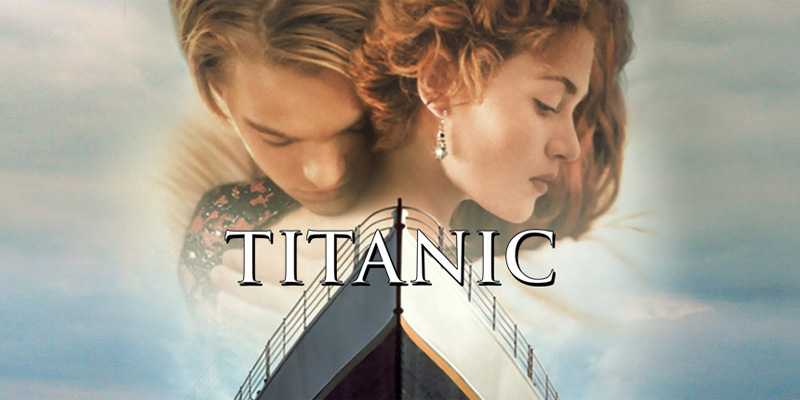

In this file using following columns build a model to predict if person would survive or not,
Pclass
Sex
Age
Fare

### Calculate score of your model

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv("csv/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [43]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [44]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [45]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
inputs.Sex

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [46]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [47]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [48]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [50]:
len(X_train)

712

In [51]:
len(X_test)

179

In [8]:
#first we have to create our label Encoder
from sklearn.preprocessing import LabelEncoder
le_p_class = LabelEncoder()
le_sex = LabelEncoder()
le_age = LabelEncoder()
le_fare = LabelEncoder()

In [34]:
#inputs_survived['Pclass_n'] = le_p_class.fit_transform(inputs_survived['Pclass'])
#inputs_survived['Sex_n'] = le_sex.fit_transform(inputs_survived['Sex'])
#inputs_survived['Age_n'] = le_age.fit_transform(inputs_survived['Age'])
#inputs_survived['Fare_n'] = le_fare.fit_transform(inputs_survived['Fare'])
#now check that input survived numeric values are created or not
#inputs_survived

In [35]:
### Now we should drop the categorical column
#inputs_survived_n = inputs_survived.drop(['Pclass','Sex','Age','Fare','Name','Ticket','Cabin','Embarked'],axis='columns')
#inputs_survived_n.head(1)

In [52]:
### Now we will create the decesion tree model
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [53]:
## Now our decesion tree model is created
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
model.score(X_test,y_test)

0.7988826815642458